<a href="https://colab.research.google.com/github/jvera672/cd_202202_juan_vera/blob/main/Taller_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [ ]:
#Datos de hoteles
ruta = 'https://raw.githubusercontent.com/rpizarrog/FundamentosMachineLearning/master/datos/melb_data.csv'
df = pd.read_csv(ruta)

In [ ]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
df = df.select_dtypes(exclude=['object'])

In [ ]:
#Buscar nulos
df.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

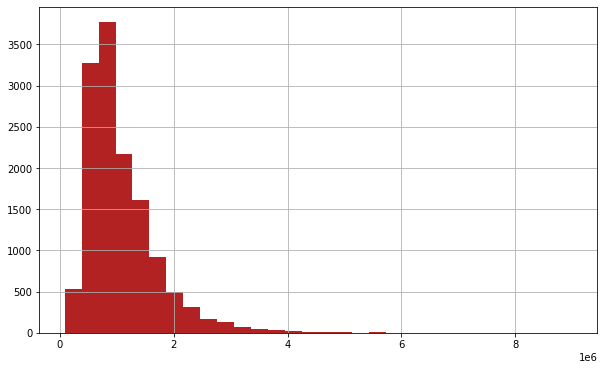

In [ ]:
#Histograma
df.Price.hist(color='firebrick', bins=30, figsize=(10, 6))

In [ ]:
#Borrado de datos nulos
df = df.dropna()
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


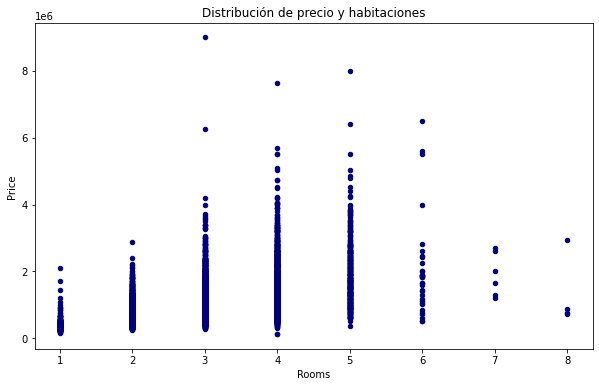

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'Rooms', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y habitaciones');

In [ ]:
df0 = df.copy()
for columna in df:
  df0 = df0[(np.abs(zscore(df0[columna]))<=3)]

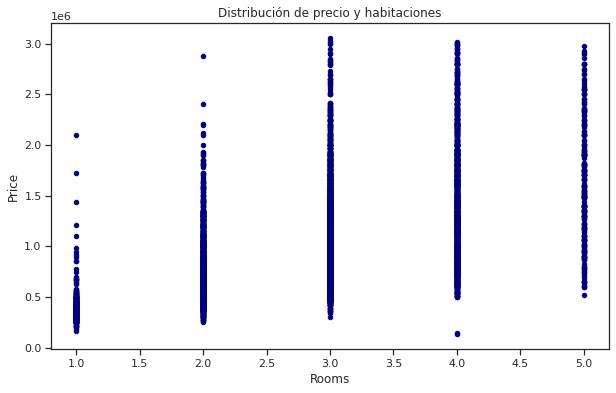

In [ ]:
#Diagrama de distribución Arreglada
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'Rooms', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y habitaciones');

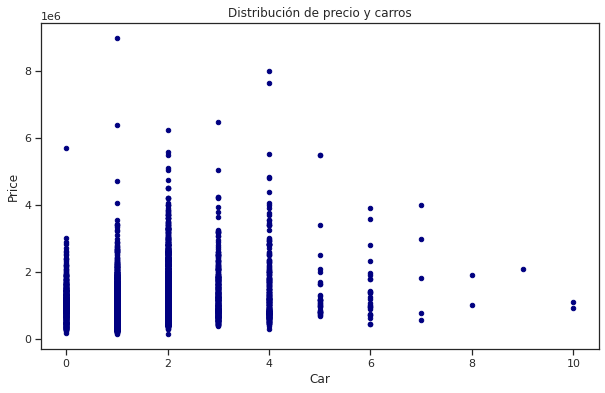

In [ ]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'Car', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y carros');

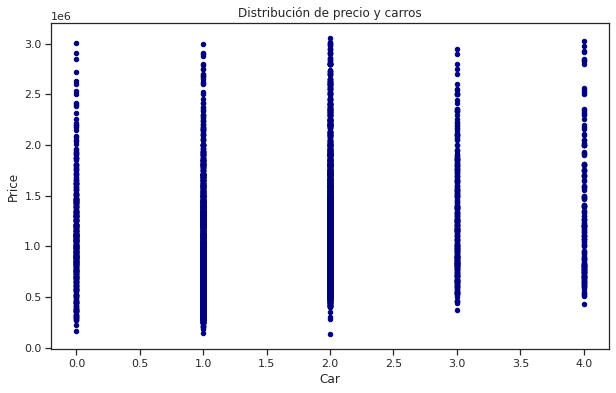

In [ ]:
#Diagrama de distribución Arreglada
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'Car', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y carros');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     2646.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:58:09   Log-Likelihood:                -86605.
No. Observations:                6005   AIC:                         1.732e+05
Df Residuals:                    6003   BIC:                         1.732e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.078e+05    1.9e+04      5.663      0.0

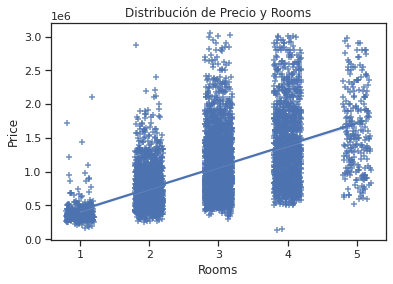

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     69.15
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           1.12e-16
Time:                        13:58:09   Log-Likelihood:                -87667.
No. Observations:                6005   AIC:                         1.753e+05
Df Residuals:                    6003   BIC:                         1.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.156e+06   1.54e+04     74.992      0.0

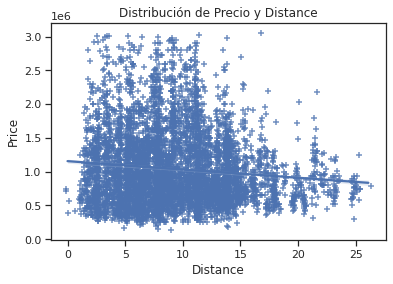

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     497.5
Date:                Sat, 24 Sep 2022   Prob (F-statistic):          6.09e-106
Time:                        13:58:10   Log-Likelihood:                -87462.
No. Observations:                6005   AIC:                         1.749e+05
Df Residuals:                    6003   BIC:                         1.749e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.473e+06   3.37e+05    -19.210      0.0

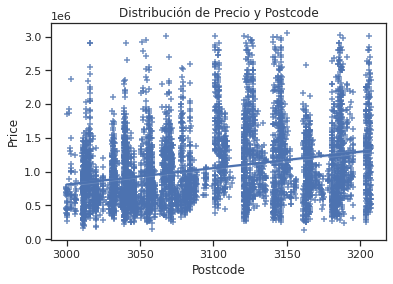

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     2495.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:58:11   Log-Likelihood:                -86658.
No. Observations:                6005   AIC:                         1.733e+05
Df Residuals:                    6003   BIC:                         1.733e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.317e+05   1.91e+04      6.892      0.0

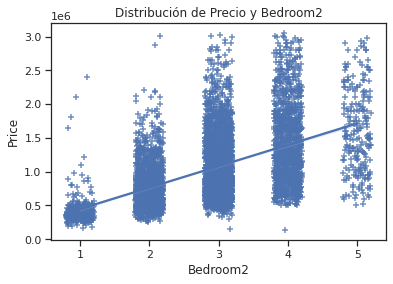

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1592.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):          4.69e-309
Time:                        13:58:11   Log-Likelihood:                -86995.
No. Observations:                6005   AIC:                         1.740e+05
Df Residuals:                    6003   BIC:                         1.740e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.452e+05   1.61e+04     27.583      0.0

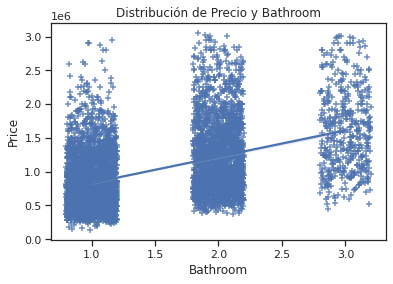

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     382.6
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           1.22e-82
Time:                        13:58:12   Log-Likelihood:                -87516.
No. Observations:                6005   AIC:                         1.750e+05
Df Residuals:                    6003   BIC:                         1.750e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.002e+05    1.4e+04     57.107      0.0

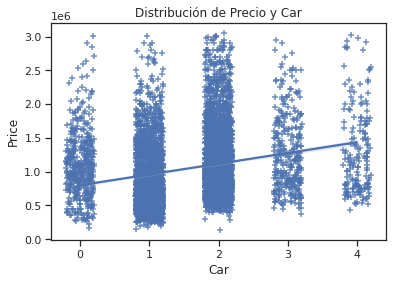

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           2.64e-82
Time:                        13:58:12   Log-Likelihood:                -87517.
No. Observations:                6005   AIC:                         1.750e+05
Df Residuals:                    6003   BIC:                         1.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.906e+05   1.02e+04     87.332      0.0

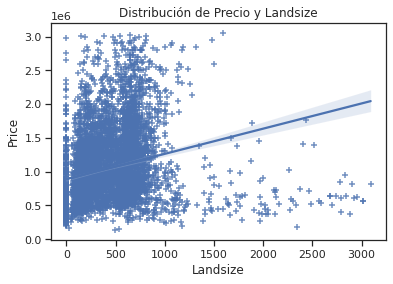

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3877.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:58:13   Log-Likelihood:                -86205.
No. Observations:                6005   AIC:                         1.724e+05
Df Residuals:                    6003   BIC:                         1.724e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.254e+05   1.27e+04     25.652   

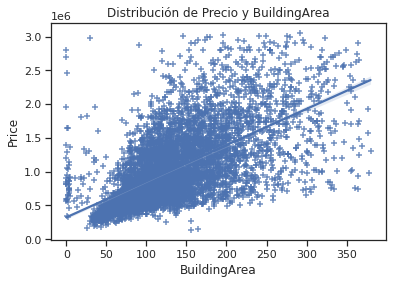

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     928.1
Date:                Sat, 24 Sep 2022   Prob (F-statistic):          1.12e-189
Time:                        13:58:13   Log-Likelihood:                -87270.
No. Observations:                6005   AIC:                         1.745e+05
Df Residuals:                    6003   BIC:                         1.746e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.147e+07   3.42e+05     33.503      0.0

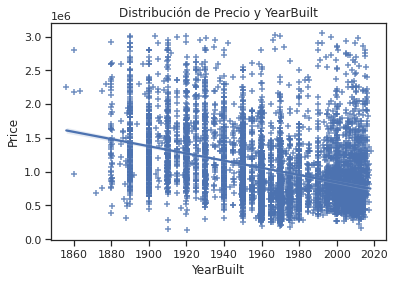

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     402.7
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           9.50e-87
Time:                        13:58:14   Log-Likelihood:                -87506.
No. Observations:                6005   AIC:                         1.750e+05
Df Residuals:                    6003   BIC:                         1.750e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.205e+07   3.64e+06    -19.781      0.0

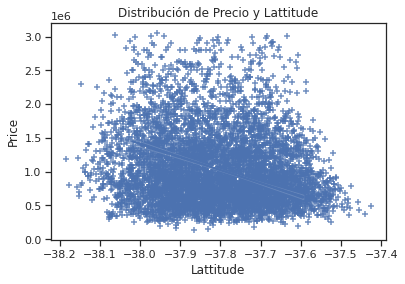

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     364.0
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           7.73e-79
Time:                        13:58:14   Log-Likelihood:                -87525.
No. Observations:                6005   AIC:                         1.751e+05
Df Residuals:                    6003   BIC:                         1.751e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.011e+08   1.06e+07    -18.981      0.0

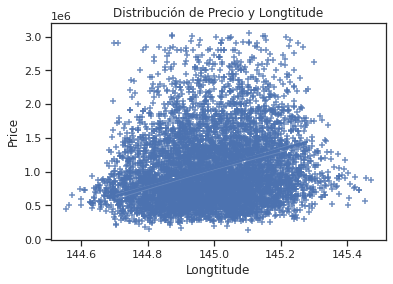

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.591
Date:                Sat, 24 Sep 2022   Prob (F-statistic):              0.207
Time:                        13:58:15   Log-Likelihood:                -87701.
No. Observations:                6005   AIC:                         1.754e+05
Df Residuals:                    6003   BIC:                         1.754e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.025e+06   1.48e+04     69.350

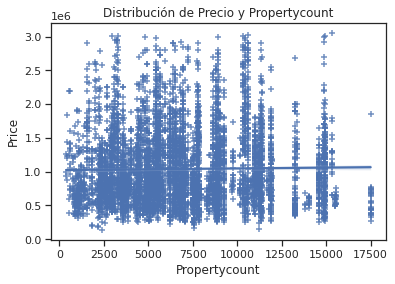

----------------------
----------------------
----------------------
----------------------
Best R-squared: 0.39240185180401554
----------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3877.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:58:15   Log-Likelihood:                -86205.
No. Observations:                6005   AIC:                         1.724e+05
Df Residuals:                    6003   BIC:                         1.724e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|   

In [ ]:
bestR = 0.0
bestEst2 = None
for column in df0:
  if column != "Price":
    x = df0[column]
    y = df0["Price"]
    x2 = sm.add_constant(x)
    est = sm.OLS(y, x2)
    est2 = est.fit()
    if(est2.rsquared > bestR):
      bestR = est2.rsquared
      bestEst2 = est2
    print(est2.summary())
    sb.set_theme(color_codes=True)
    sb.set_theme(style="ticks")
    ax = sb.regplot(x=column, y="Price", data=df0, marker='+', x_jitter=0.2, y_jitter=0.2)
    ax.set_title('Distribución de Precio y ' + column);
    plt.show(ax)
print("----------------------")
print("----------------------")
print("----------------------")
print("----------------------")
print("Best R-squared: " + str(bestR))
print("----------------------")
print(bestEst2.summary())


In [ ]:
df0.iloc[:,[2,4]]

,Distance,Bedroom2
1,2.5,2.0
2,2.5,3.0
4,2.5,3.0
6,2.5,4.0
7,2.5,2.0
...,...,...
13572,14.5,2.0
13573,14.7,4.0
13576,6.8,3.0
13578,6.8,4.0


In [ ]:
completedList = []
bestR = 0.0
bestEst2 = None
isValidPair = True
#counter = 0
for column1 in df0:
  for column2 in df0:
    if(column1 != column2 and (column1 != "Price") and (column2 != "Price")):
      if(len(completedList) > 0):
        for colPair in completedList:
          if((column1 in colPair) and (column2 in colPair)):
            isValidPair = False
      if(isValidPair):
        #counter += 1
        completedList.append([column1, column2])
        x = df0[[column1, column2]]
        y = df0["Price"]
        x2 = sm.add_constant(x)
        est = sm.OLS(y, x2)
        est2 = est.fit()
        if(est2.rsquared > bestR):
          bestR = est2.rsquared
          bestEst2 = est2
        #print(est2.summary())
        #print(counter)
    isValidPair = True
print("----------------------")
print("Best R-squared: " + str(bestR))
print("----------------------")
print(bestEst2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


----------------------
Best R-squared: 0.5364135126225607
----------------------
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     3472.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:58:47   Log-Likelihood:                -85393.
No. Observations:                6005   AIC:                         1.708e+05
Df Residuals:                    6002   BIC:                         1.708e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------